# Applied Machine Learning: Unsupervised Learning

## Preamble and Datasets

In [3]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer




# Breast cancer dataset
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)




# Our sample fruits dataset
fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']]
y_fruits = fruits[['fruit_label']] - 1



<div class="alert alert-block alert-info">

### 
## Dimensionality Reduction and Manifold Learning

</div>




<div class="alert alert-block alert-info">

### Principal Components Analysis (PCA)
</div>

#### Using PCA to find the first two principal components of the breast cancer dataset

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer



cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)


In [10]:
X_cancer

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [11]:
"""
Notice here since we're not doing supervised learning in evaluating a model against a test set,
we don't have to split our dataset into training and test sets. 

You see that if we take the shape of the array that's returned from PCA, 
it's transformed our original dataset with 30 features 
into a new array that has just two columns, 
essentially expressing each original data point in terms of two new features
representing the position of the data point in this new two-dimensional PCA space. 
"""


# Before applying PCA, each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

pca = PCA(n_components = 2).fit(X_normalized)  # pca object


X_pca = pca.transform(X_normalized)
print(X_cancer.shape, X_pca.shape)



(569, 30) (569, 2)


"\nNotice here since we're not doing supervised learning in evaluating a model against a test set,\nwe don't have to split our dataset into training and test sets. \n\nYou see that if we take the shape of the array that's returned from PCA, \nit's transformed our original dataset with 30 features \ninto a new array that has just two columns, \nessentially expressing each original data point in terms of two new features\nrepresenting the position of the data point in this new two-dimensional PCA space. \n"

#### Plotting the PCA-transformed version of the breast cancer dataset

<IPython.core.display.Javascript object>


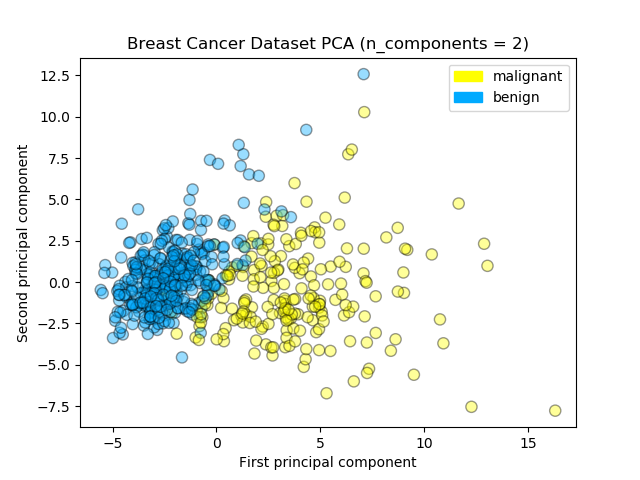

In [5]:
"""
We can then create a scatterplot that uses these two new features
to see how the data forms clusters. 

In this example, we've used the dataset that has labels for supervised learning;
namely, the malignant and benign labels on cancer cells. 

So we can see how well PCA serves to find clusters in the data.
Here's the result of plotting all the 30 feature data samples
using the two new features computed with PCA. 

We can see that the malignant and benign cells do indeed tend to cluster into two groups in the space.
In fact, we could now apply a linear classifier 
to this two-dimensional representation of the original dataset
and we can see that it would likely do fairly well. 

This illustrates another use of dimensionality reduction methods like PCA
to find informative features that could then be used in a later supervised learning stage.

"""

from adspy_shared_utilities import plot_labelled_scatter


plot_labelled_scatter(X_pca, y_cancer, ['malignant', 'benign'])

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Breast Cancer Dataset PCA (n_components = 2)');

#### Plotting the magnitude of each feature value for the first two principal components

<IPython.core.display.Javascript object>


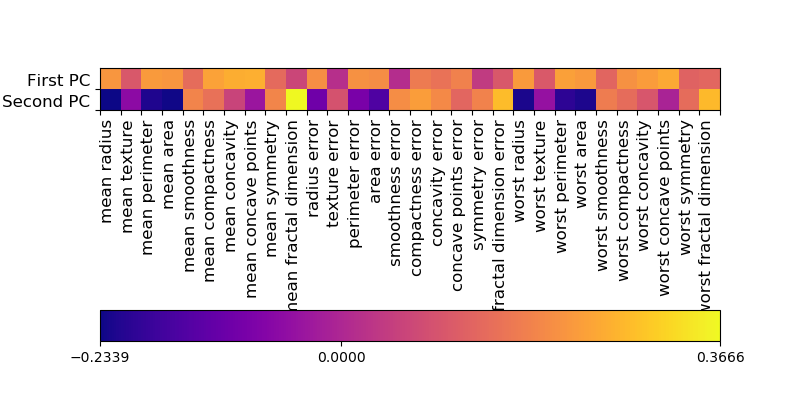

In [12]:
fig = plt.figure(figsize=(8, 4))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.65);

#### PCA on the fruit dataset (for comparison)

<IPython.core.display.Javascript object>


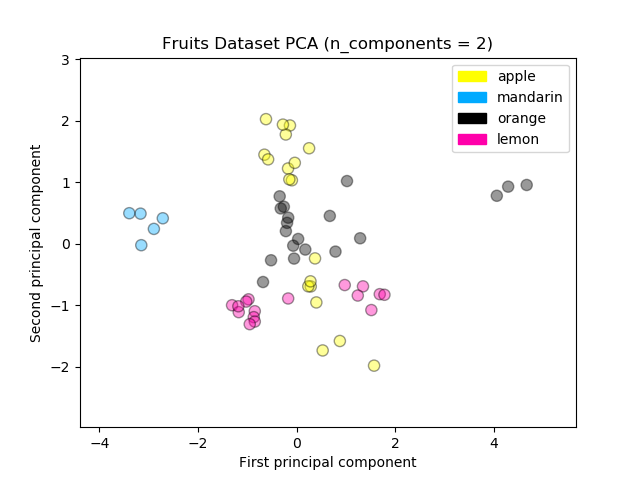

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)

#from adspy_shared_utilities import plot_labelled_scatter
from adspy_shared_utilities_rev import plot_labelled_scatter   #dspy_shared_utilities_rev with updated codes to new versions of matplotlib.
plot_labelled_scatter(X_pca, y_fruits, ['apple','mandarin','orange','lemon'])

plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Fruits Dataset PCA (n_components = 2)');





<div class="alert alert-block alert-info">
    
### Manifold learning methods
</div>

#### Multidimensional scaling (MDS) on the fruit dataset

<IPython.core.display.Javascript object>


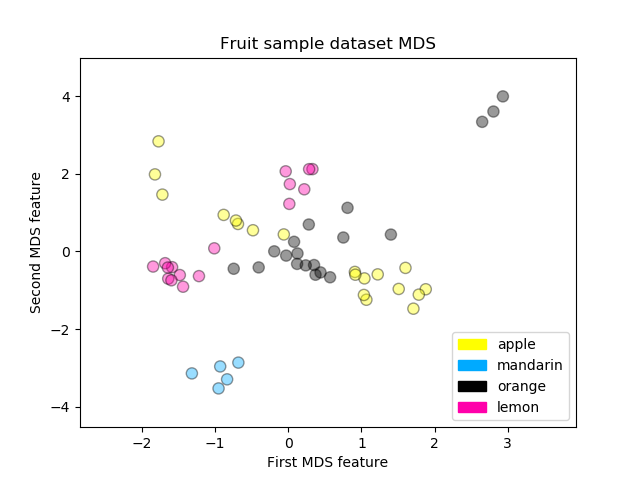

In [17]:
#from adspy_shared_utilities import plot_labelled_scatter
from adspy_shared_utilities_rev import plot_labelled_scatter   ## correction in 2020


from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

# each feature should be centered (zero mean) and with unit variance
X_fruits_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

mds = MDS(n_components = 2)

X_fruits_mds = mds.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_fruits_mds, y_fruits, ['apple', 'mandarin', 'orange', 'lemon'])
plt.xlabel('First MDS feature')
plt.ylabel('Second MDS feature')
plt.title('Fruit sample dataset MDS');

#### Multidimensional scaling (MDS) on the breast cancer dataset

(This example is not covered in the lecture video, but is included here so you can compare it to the results from PCA.)

<IPython.core.display.Javascript object>


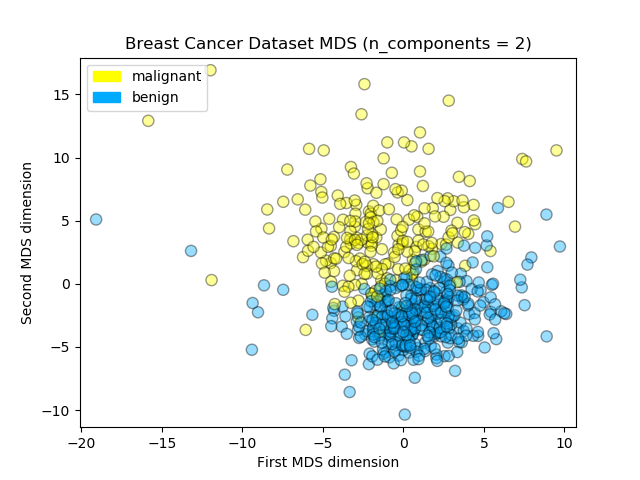

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

mds = MDS(n_components = 2)

X_mds = mds.fit_transform(X_normalized)

#from adspy_shared_utilities import plot_labelled_scatter
from adspy_shared_utilities_rev import plot_labelled_scatter


plot_labelled_scatter(X_mds, y_cancer, ['malignant', 'benign'])

plt.xlabel('First MDS dimension')
plt.ylabel('Second MDS dimension')
plt.title('Breast Cancer Dataset MDS (n_components = 2)');

#### t-SNE on the fruit dataset

(This example from the lecture video is included so that you can see how some dimensionality reduction methods may be less successful on some datasets. Here, it doesn't work as well at finding structure in the small fruits dataset, compared to other methods like MDS.)

<IPython.core.display.Javascript object>


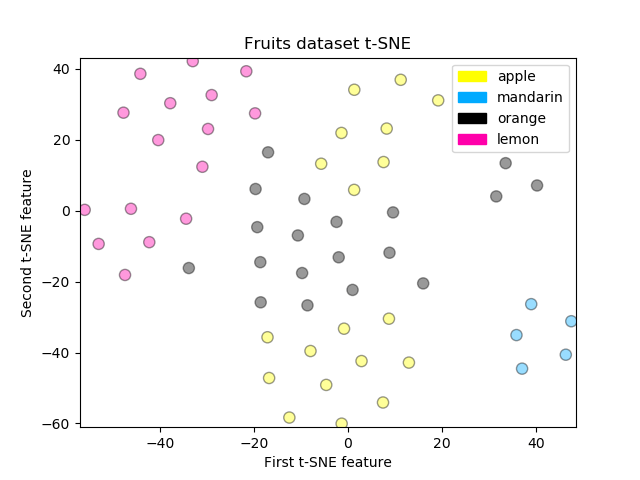

In [21]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_tsne, y_fruits, 
    ['apple', 'mandarin', 'orange', 'lemon'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Fruits dataset t-SNE');

#### t-SNE on the breast cancer dataset

Although not shown in the lecture video, this example is included for comparison, showing the results of running t-SNE on the breast cancer dataset.  See the reading "How to Use t-SNE effectively" for further details on how the visualizations from t-SNE are affected by specific parameter settings.

<IPython.core.display.Javascript object>


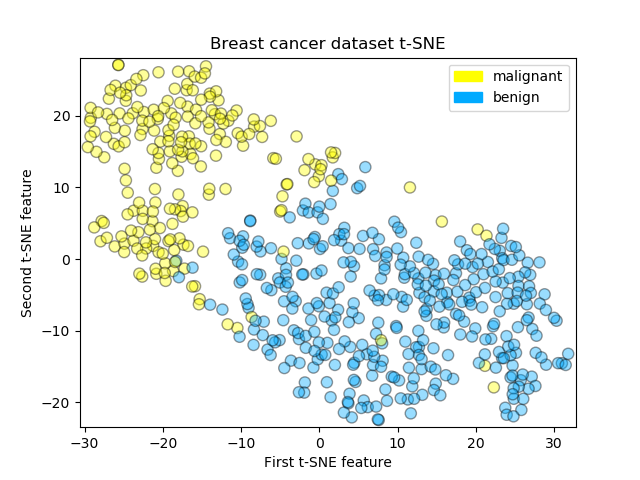

In [22]:
tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_normalized)

plot_labelled_scatter(X_tsne, y_cancer, 
    ['malignant', 'benign'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Breast cancer dataset t-SNE');



<div class="alert alert-block alert-info">

## Clustering
</div>





<div class="alert alert-block alert-warning">

### K-means
</div>

This example from the lecture video creates an artificial dataset with make_blobs, then applies k-means to find 3 clusters, and plots the points in each cluster identified by a corresponding color.

<IPython.core.display.Javascript object>


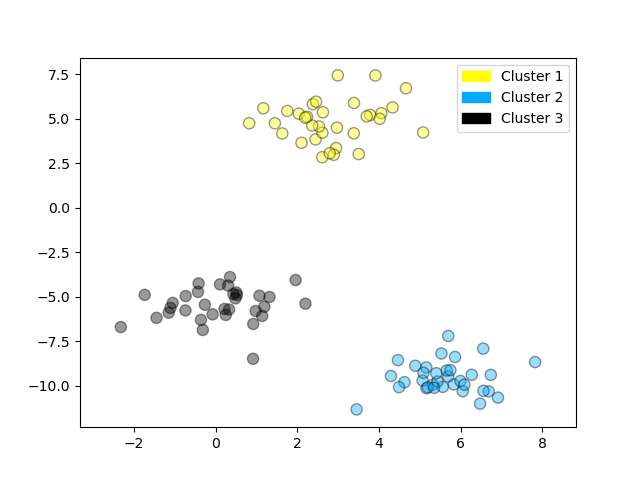

In [23]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter

X, y = make_blobs(random_state = 10)

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

plot_labelled_scatter(X, kmeans.labels_, ['Cluster 1', 'Cluster 2', 'Cluster 3'])


Example showing k-means used to find 4 clusters in the fruits dataset.  Note that in general, it's important to scale the individual features before applying k-means clustering.

c:\users\dalciana\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


<IPython.core.display.Javascript object>


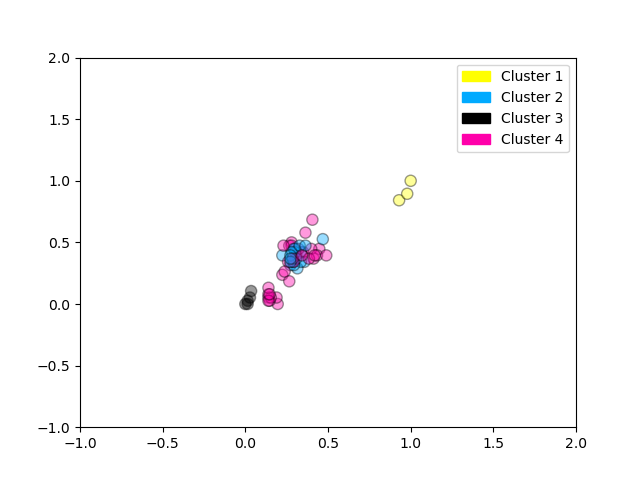

In [26]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import MinMaxScaler

fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['mass','width','height', 'color_score']].as_matrix()
y_fruits = fruits[['fruit_label']] - 1

X_fruits_normalized = MinMaxScaler().fit(X_fruits).transform(X_fruits)  

kmeans = KMeans(n_clusters = 4, random_state = 0)
#kmeans.fit(X_fruits)
kmeans.fit(X_fruits_normalized)#<--------------------------

plot_labelled_scatter(X_fruits_normalized, kmeans.labels_, 
                      ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

### 

<div class="alert alert-block alert-warning">

### Agglomerative clustering
</div>

<IPython.core.display.Javascript object>


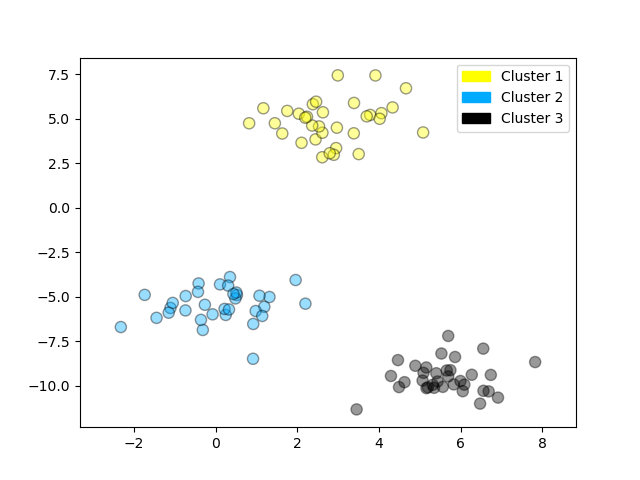

In [27]:
from sklearn.datasets import make_blobs

from sklearn.cluster import AgglomerativeClustering
from adspy_shared_utilities import plot_labelled_scatter



X, y = make_blobs(random_state = 10)

cls = AgglomerativeClustering(n_clusters = 3)
cls_assignment = cls.fit_predict(X)


plot_labelled_scatter(X, cls_assignment, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])

#### Creating a dendrogram (using scipy)

This dendrogram plot is based on the dataset created in the previous step with make_blobs, but for clarity, only 10 samples have been selected for this example, as plotted here:

<IPython.core.display.Javascript object>


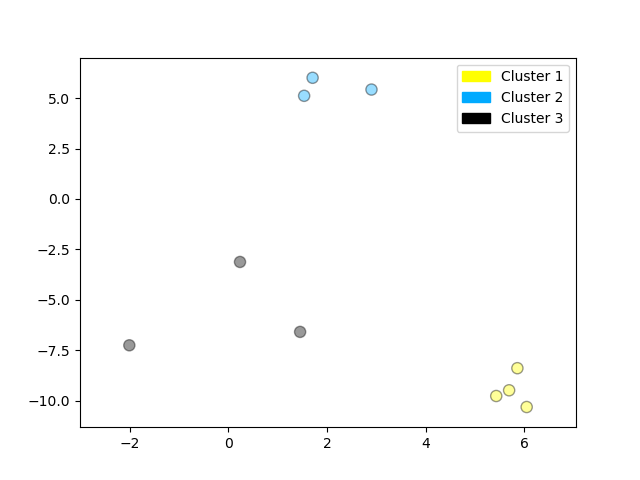

[[  5.69192445  -9.47641249]
 [  1.70789903   6.00435173]
 [  0.23621041  -3.11909976]
 [  2.90159483   5.42121526]
 [  5.85943906  -8.38192364]
 [  6.04774884 -10.30504657]
 [ -2.00758803  -7.24743939]
 [  1.45467725  -6.58387198]
 [  1.53636249   5.11121453]
 [  5.4307043   -9.75956122]]


In [28]:
X, y = make_blobs(random_state = 10, n_samples = 10)

plot_labelled_scatter(X, y, 
        ['Cluster 1', 'Cluster 2', 'Cluster 3'])
print(X)

And here's the dendrogram corresponding to agglomerative clustering of the 10 points above using Ward's method.  The index 0..9 of the points corresponds to the index of the points in the X array above.  For example, point 0 (5.69, -9.47) and point 9 (5.43, -9.76) are the closest two points and are clustered first.

<IPython.core.display.Javascript object>


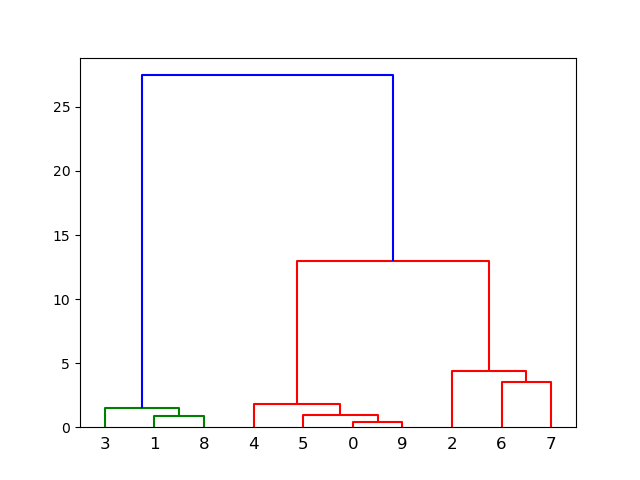

In [29]:
from scipy.cluster.hierarchy import ward, dendrogram

plt.figure()
dendrogram(ward(X))
plt.show()



<div class="alert alert-block alert-warning">

### DBSCAN clustering
</div>

Cluster membership values:
[ 0  1  0  2  0  0  0  2  2 -1  1  2  0  0 -1  0  0  1 -1  1  1  2  2  2
  1]


<IPython.core.display.Javascript object>


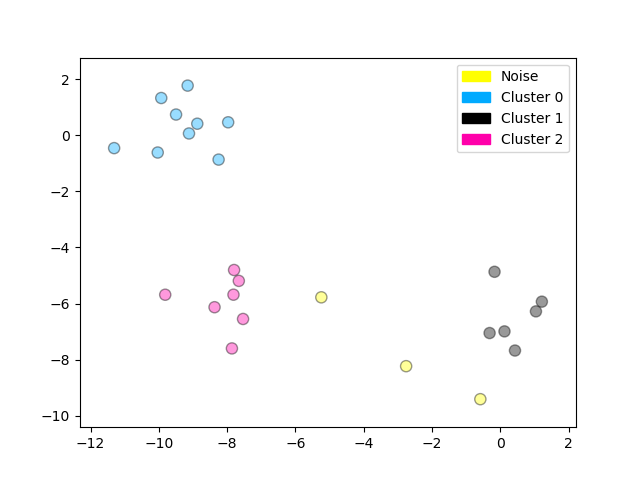

In [30]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs


X, y = make_blobs(random_state = 9, n_samples = 25)

dbscan = DBSCAN(eps = 2, min_samples = 2)

cls = dbscan.fit_predict(X)
print("Cluster membership values:\n{}".format(cls))

plot_labelled_scatter(X, cls + 1, 
        ['Noise', 'Cluster 0', 'Cluster 1', 'Cluster 2'])